# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
#  1. Get the total rides for each city type
# Create the City DataFrames.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]

In [4]:
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]

In [5]:
# 2. Get the total drivers for each city type
# Get the driver count data from the urban cities.
total_drivers = city_data_df.groupby(["type"]).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [6]:
group_urban_drivers = total_drivers.groupby(["type"]).sum()['Urban']
group_urban_drivers

2405

In [7]:
group_suburban_drivers = total_drivers.groupby(["type"]).sum()['Suburban']
group_suburban_drivers

490

In [8]:
group_rural_drivers = total_drivers.groupby(["type"]).sum()['Rural']
group_rural_drivers

78

In [9]:
#  3. Get the total amount of fares for each city type
fare_totals = pyber_data_df.groupby(["type"]).sum()["fare"]
fare_totals

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [10]:
urban_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
suburban_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
rural_fare = rural_cities_df.groupby(["city"]).sum()["fare"]

In [11]:
urban_fare_total = pd.Series([urban_fare][0]).sum()
urban_fare_total

39854.38000000001

In [12]:
suburban_fare_total = pd.Series([suburban_fare][0]).sum()
suburban_fare_total

19356.33

In [13]:
rural_fare_total = pd.Series([rural_fare][0]).sum()
rural_fare_total

4327.93

In [14]:
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [15]:
urban_ride_total = pd.Series([urban_ride_count][0]).sum()
urban_ride_total

1625

In [16]:
suburban_ride_total = pd.Series([suburban_ride_count][0]).sum()
suburban_ride_total

625

In [17]:
rural_ride_total = pd.Series([rural_ride_count][0]).sum()
rural_ride_total

125

In [18]:
# 4. Get the average fare per ride by city type
avg_urban_fare = urban_fare_total / urban_ride_total
avg_urban_fare

24.525772307692314

In [19]:
avg_suburban_fare = suburban_fare_total / suburban_ride_total
avg_suburban_fare

30.970128000000003

In [20]:
avg_rural_fare = rural_fare_total / rural_ride_total
avg_rural_fare

34.62344

In [21]:
# 5. Get the average fare per driver for each city type. 
avg_udriver_fare = urban_fare_total / group_urban_drivers
avg_udriver_fare

16.57146777546778

In [22]:
avg_subdriver_fare = suburban_fare_total / group_suburban_drivers
avg_subdriver_fare

39.50271428571429

In [23]:
avg_rdriver_fare = rural_fare_total / group_rural_drivers
avg_rdriver_fare

55.48628205128205

In [24]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary = {
        "Total Rides": [rural_ride_total, suburban_ride_total, urban_ride_total],
        "Total Drivers": [group_rural_drivers, group_suburban_drivers, group_urban_drivers],
        "Total Fares": [rural_fare_total, suburban_fare_total, urban_fare_total],
        "Average Fare per Ride": [avg_rural_fare, avg_suburban_fare, avg_urban_fare],
        "Average Fare per Driver": [avg_rdriver_fare, avg_subdriver_fare, avg_udriver_fare]
}
pyber_summary_df = pd.DataFrame(pyber_summary)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
0,125,78,4327.93,34.623440,55.486282
1,625,490,19356.33,30.970128,39.502714
2,1625,2405,39854.38,24.525772,16.571468


In [25]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index = ["Rural", "Suburban", "Urban"]
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [26]:
#  8. Format the columns.
# Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,2405,"$39,854.38",$24.53,$16.57


In [38]:
x_axis = pyber_summary_df.index
y_axis = pyber_summary_df["Total Fares"]

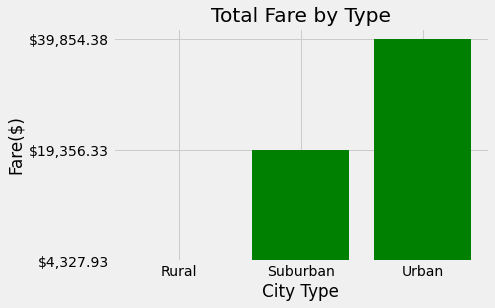

In [83]:
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
plt.bar(x_axis, y_axis, color="green")
plt.ylim(ymin=0)
# Create labels for the x and y axes.
plt.xlabel("City Type")
plt.ylabel("Fare($)")
# Create a title.
plt.title("Total Fare by Type")
plt.savefig("analysis/Fig9.png")
plt.show()

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [84]:
# 1. Read the merged DataFrame
#urban_cities_df.head()
index_df = pyber_data_df.set_index(["type", "date"])
index_df.head()

city   fare        ride_id  \
type  date                                                            
Urban 2019-01-14 10:14:22  Lake Jonathanshire  13.83  5739410935873   
      2019-03-04 18:24:09  South Michelleport  30.24  2343912425577   
      2019-02-24 04:29:00  Port Samanthamouth  33.44  2005065760003   
      2019-02-10 23:22:03          Rodneyfort  23.44  5149245426178   
      2019-03-06 04:28:35          South Jack  34.58  3908451377344   

                           driver_count  
type  date                               
Urban 2019-01-14 10:14:22             5  
      2019-03-04 18:24:09            72  
      2019-02-24 04:29:00            57  
      2019-02-10 23:22:03            34  
      2019-03-06 04:28:35            46

In [85]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_summary = index_df.groupby(["type", "date"]).sum()["fare"]
type_date_summary

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [86]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
test_type_date_summary = type_date_summary.reset_index()
test_type_date_summary

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [87]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_df = test_type_date_summary.pivot(index='date', columns='type', values='fare')

In [88]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
date_range = pivot_df.loc['2019-01-01':'2019-04-29']

In [89]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
date_range.index = pd.to_datetime(date_range.index)
date_range.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [90]:
# 7. Check that the datatype for the index is datetime using df.info()
date_range.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [91]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
week_range = date_range.resample('W').sum()

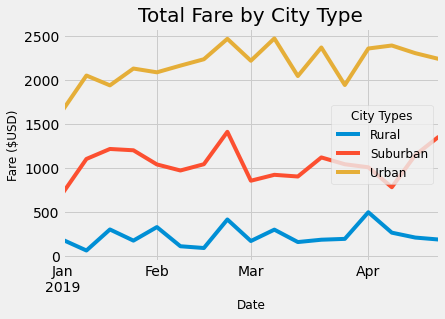

In [92]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
week_range.plot()
plt.title("Total Fare by City Type", fontsize=20)
plt.ylabel("Fare ($USD)", fontsize=12)
plt.xlabel("Date", fontsize=12)
lgnd = plt.legend(fontsize="12", mode="Expanded",
         loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)
plt.savefig("analysis/Fig8.png")
plt.show()
